In [2]:
import numpy as np
import matplotlib.pyplot as plt
from myotc.utils import approx_stat_dist, exact_otc, fgw_dist, computeot_lp, eval_alignment

# Helper function to generate point cloud
def get_pointcloud(mean_sigma, block_size, n_blocks, dim):
    point_sigma = 1
    means = np.random.normal(0, mean_sigma, (n_blocks, dim))
    points = np.zeros((block_size * n_blocks, dim))
    for c in range(n_blocks):
        for dim_idx in range(dim):
            points[c * block_size: (c + 1) * block_size, dim_idx] = np.random.normal(means[c, dim_idx], point_sigma, block_size)
    return points, means

# Params
# block_size = 5;
# n_blocks = 2;
# n = block_size*n_blocks;
# dim = 2;
block_size = 5;
n_blocks = 2;
n = block_size*n_blocks;
dim = 2;

mean_sigma = 10  # Example value

# Generate point clouds V1 and V2
V1, V2 = get_pointcloud(mean_sigma, block_size, n_blocks, dim)



# Generate random matrix A2
A2 = np.random.randint(1, 11, (n_blocks, n_blocks))

# Generate matrix A1
A1 = np.zeros((n, n))
for i in range(n_blocks):
    for j in range(n_blocks):
        for k in range(block_size):
            rv = np.random.rand(block_size)
            rv = rv * A2[i, j] / np.sum(rv) / block_size
            A1[i * block_size + k, j * block_size: (j + 1) * block_size] = rv

# print(A1.shape, A2.shape, V1.shape, V2.shape)

V1 = np.array([
[1.4786,-0.2885],
[-0.8243,-1.7479],
[-0.5537,-0.1875],
[-0.4139,-0.5610],
[0.1822,-0.1728],
[-0.7730,-0.5754],
[-0.6185, 0.3518],
[-0.4191,-0.7918],
[-0.4780,-0.1640],
[-1.6767,-0.6409],
])

V2 = np.array([
[0.2192,-0.8808],
[-0.4677,-0.2467]
])
A1 = np.array([
    [0.3732, 0.2756, 0.1131, 0.2063, 0.0318, 0.3099, 0.1997, 0.3172, 0.1452, 0.4280],
    [0.0380, 0.3102, 0.2640, 0.3277, 0.0602, 0.2431, 0.3631, 0.2348, 0.2918, 0.2672],
    [0.2087, 0.1455, 0.2907, 0.1457, 0.2094, 0.4533, 0.3134, 0.5515, 0.0531, 0.0287],
    [0.5610, 0.1954, 0.0877, 0.0836, 0.0723, 0.0174, 0.2860, 0.2580, 0.3980, 0.4406],
    [0.1354, 0.2900, 0.1278, 0.1819, 0.2650, 0.6785, 0.5636, 0.0525, 0.0055, 0.0999],
    [0.0898, 0.0852, 0.1621, 0.1234, 0.1396, 0.1554, 0.1405, 0.0924, 0.1292, 0.0825],
    [0.0245, 0.0141, 0.0405, 0.2885, 0.2324, 0.1785, 0.1503, 0.0545, 0.0357, 0.1811],
    [0.0221, 0.1822, 0.1985, 0.0923, 0.1049, 0.0715, 0.1978, 0.1074, 0.1214, 0.1019],
    [0.2546, 0.0795, 0.0283, 0.1815, 0.0561, 0.2094, 0.1357, 0.0052, 0.2314, 0.0184],
    [0.1280, 0.0451, 0.3293, 0.0773, 0.0203, 0.1448, 0.3196, 0.0410, 0.0077, 0.0869]
])
A2 = np.array([
    [5, 7],
    [3, 3]
])
print(V1.shape, V2.shape)
print(A1.shape, A2.shape)

P1 = A1 / np.sum(A1, axis=1)[:, np.newaxis]
P2 = A2 / np.sum(A2, axis=1)[:, np.newaxis]

# stat_dist1 = approx_stat_dist(P1, 100)
# stat_dist2 = approx_stat_dist(P2, 100)
# stat_dist3 = np.ones((n, 1)) / n
# stat_dist4 = np.ones((n_blocks, 1)) / n_blocks

# print(stat_dist3.shape, stat_dist4.shape)
c = np.zeros((n, n_blocks)) # checked

for i in range(n):
    for j in range(n_blocks):
        c[i, j] = np.sum((V1[i, :] - V2[j, :]) ** 2)

cost, otc_edge_alignment, otc_alignment = exact_otc(P1, P2, c)
print(f"cost: {cost}")
np.save('otc_edge_alignment.npy', otc_edge_alignment)
np.save('A1.npy', A1)
np.save('A2.npy', A2)
np.save('V1.npy', V1)
np.save('V2.npy', V2)
print(otc_alignment.shape)
aligned_mass_otc = eval_alignment(otc_alignment, block_size, n_blocks)
# aligned_mass_fgw = eval_alignment(fgw_alignment, block_size, n_blocks)
# aligned_mass_otsd = eval_alignment(otsd_alignment, block_size, n_blocks)
# print(aligned_mass_otc)
# 初始化 values，假设它是一个空列表
values = []

# 存储结果
values.append(['OTC', aligned_mass_otc])
# values.append(['FGW', aligned_mass_fgw])
# values.append(['OT-SD', aligned_mass_otsd])

for value in values:
    print(value)

# Plot V1 and V2 as scatter plots for visualization
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.scatter(V1[:, 0], V1[:, 1], c='r', label='V1')
# plt.title('Point Cloud V1')
# plt.xlabel('Dim 1')
# plt.ylabel('Dim 2')

# plt.subplot(1, 2, 2)
# plt.scatter(V2[:, 0], V2[:, 1], c='b', label='V2')
# plt.title('Point Cloud V2')
# plt.xlabel('Dim 1')
# plt.ylabel('Dim 2')

# plt.tight_layout()
# plt.show()


(10, 2) (2, 2)
(10, 10) (2, 2)
cost: 0.7264478450557728
(10, 2)
['OTC', 0.7906747428470159]


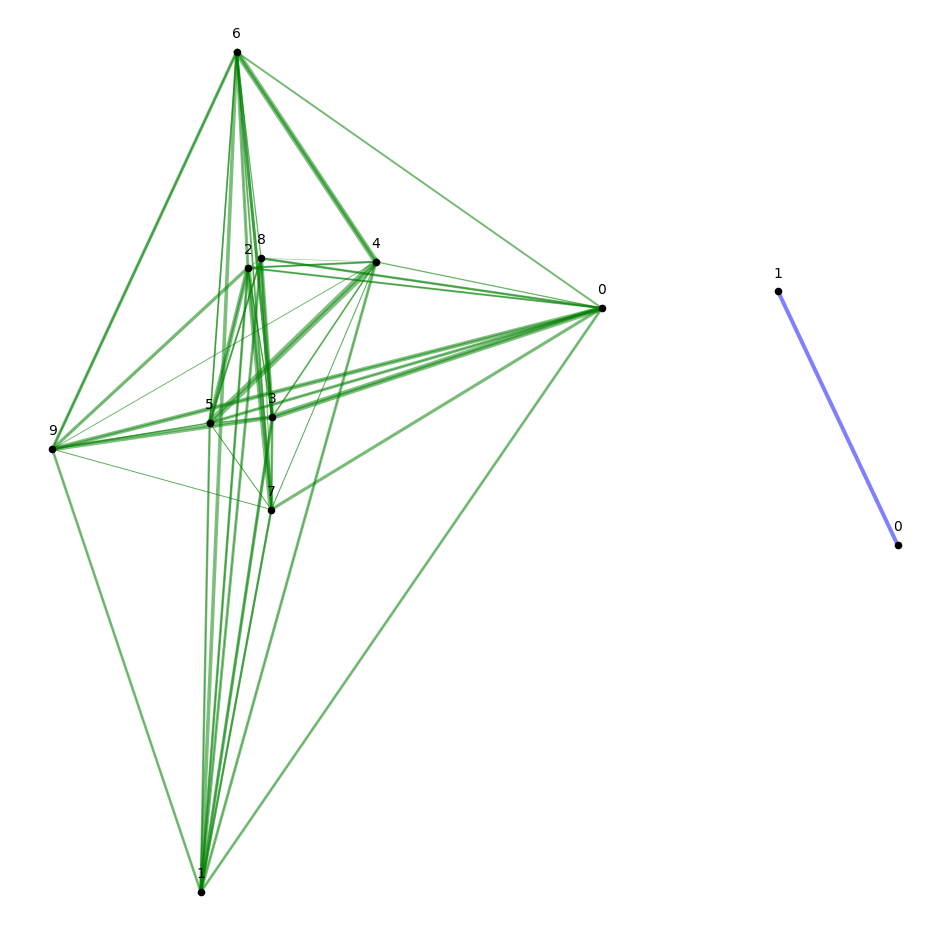

In [4]:
# Function to plot a graph using its adjacency matrix and vertex coordinates
def plot_graph(A, V, ax, color, title):
    # Plot edges
    scale_A = 5*((A - np.min(A)) / np.max(A))
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            weight = scale_A[i, j]
            if weight > 0:
                ax.plot([V[i, 0], V[j, 0]], [V[i, 1], V[j, 1]], color=color, lw=weight, alpha=0.5)
    
    # Plot vertices
    ax.scatter(V[:, 0], V[:, 1], c='black', s=20, zorder=5)
    
    # Annotate vertices
    for i, txt in enumerate(range(V.shape[0])):
        ax.annotate(txt, (V[i, 0], V[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')
    
    ax.set_title(title)

# Create a plot
# fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# # Plot the two graphs
# plot_graph(A1, V1, ax[0], 'Graph 1')
# plot_graph(A2, V2, ax[1], 'Graph 2')

# plt.show()

# Function to plot graph alignment using otc_edge_alignment matrix
def plot_graph_alignment(A1, V1, A2, V2, otc_edge_alignment, ax):
    # Plot the original graphs first
    
    graph_drift = [np.max(np.max(V1, axis=0))*2, 0]
    
    plot_graph(A1, V1, ax, 'green', 'Graph 1 and Graph 2 with Edge Alignment')
    plot_graph(A2, V2 + graph_drift, ax, 'blue', '')  # Offset the second graph for better visualization
    
    # Find non-zero entries in the otc_edge_alignment matrix
    alignment_indices = np.argwhere(otc_edge_alignment > 0.5)
    
    # Draw alignment edges
    for i, j in alignment_indices:
        # Determine the corresponding vertices in V1 and V2
        v1_idx = i % A1.shape[0]
        v2_idx = j % A2.shape[0]
        
        # Draw an edge between the corresponding vertices in V1 and V2
        v1_coord = V1[v1_idx, :]
        v2_coord = V2[v2_idx, :] + graph_drift  # Offset the second graph's coordinates
        ax.plot([v1_coord[0], v2_coord[0]], [v1_coord[1], v2_coord[1]], color='gray', lw=1, alpha=0.1)
    # ax.set_aspect('equal')
    ax.axis('off')

# Create a new plot
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the graph alignment
plot_graph_alignment(A1, V1, A2, V2, otc_edge_alignment, ax)

plt.show()


In [5]:
otc_edge_alignment

array([[0.1555    , 0.        , 0.11483333, 0.        , 0.        ,
        0.047125  , 0.00091667, 0.08504167, 0.01325   , 0.        ,
        0.        , 0.129125  , 0.        , 0.08320833, 0.13216667,
        0.        , 0.        , 0.0605    , 0.        , 0.17833333],
       [0.1555    , 0.        , 0.11483333, 0.        , 0.        ,
        0.047125  , 0.08425   , 0.00170833, 0.01325   , 0.        ,
        0.        , 0.129125  , 0.        , 0.08320833, 0.13216667,
        0.        , 0.        , 0.0605    , 0.        , 0.17833333],
       [0.01583267, 0.        , 0.12924461, 0.        , 0.        ,
        0.10999542, 0.13653598, 0.        , 0.02508229, 0.        ,
        0.01214186, 0.08914559, 0.        , 0.15128536, 0.09782926,
        0.        , 0.        , 0.12157827, 0.        , 0.11132869],
       [0.01583267, 0.        , 0.12924461, 0.        , 0.        ,
        0.10999542, 0.13653598, 0.        , 0.02508229, 0.        ,
        0.09547519, 0.00581226, 0.        , 0